### Tasca M7 T01 ### 

Exercicis d'algoritmes de Classificació.
- Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor, les classes de l'arxiu adjunt.

- Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

- Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

- Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

- Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix #especificidad y la matriz de confusión,
from sklearn.metrics import roc_auc_score  #Área bajo la Curva ROC (AUC-ROC). Área bajo la Curva Precision-Recall (AUC-PR): 
from sklearn.metrics import log_loss #Log Loss:
from sklearn.metrics import matthews_corrcoef #Coeficiente de Correlación de Matthews (Matthews Correlation Coefficient - MCC):

In [112]:
cd /Users/thaisrocafull/Documents/CURSOS_I_APUNTS/data_science/SPRINT 7/

/Users/thaisrocafull/Documents/CURSOS_I_APUNTS/data_science/SPRINT 7


In [113]:
df = pd.read_csv('wineData.txt', encoding="latin-1", sep=',', header=None, names=["Class","Alcohol", "Malic acid", "Ash","Alcalinity of ash","Magnesium", "Total phenols","Flavanoids", "Nonflavanoid phenols","Proanthocyanins","Color intensity", "Hue","OD280/OD315 of diluted wines", "Proline"])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

- Este dataframe, esta compuesto de 178 filas correspondientes a muestras de vinos y trata mediante 14 variables, las características químicas y físicas de vinos, con el objetivo de clasificar y analizar los vinos en función de las características.

En el documento adjunto wineNames, nos consta que hay:  3 números de instancias: 
- class 1: 59, 
- class 2: 71, 
- class 3: 48 
que suman un total de 178  y entiendo que serán el target de clasificación **Class**: tipo o categoría de vino.

**Alcohol**: El contenido de alcohol en el vino, generalmente expresado como un porcentaje del volumen.

**Malic acid**: La cantidad de ácido málico presente en el vino, que puede afectar su sabor.

**Ash**: La cantidad de ceniza en el vino después de la fermentación.

**Alcalinidad of ash**: La alcalinidad de la ceniza, que puede afectar las propiedades químicas del vino.

**Magnesium**: La cantidad de magnesio en el vino, un elemento que puede tener efectos enológicos.

**Total phenols**: La cantidad total de fenoles en el vino, que incluye varios compuestos que contribuyen al sabor y color.

**Flavanoids**: La cantidad de flavonoides en el vino, compuestos que también afectan el sabor y la calidad.

**Nonflavanoid phenols**: La cantidad de fenoles no flavonoides en el vino.

**Proanthocyanins**: La cantidad de proantocianidinas, compuestos que contribuyen a la estructura y sabor del vino.

**Color intensity**: La intensidad del color del vino.

**Hue**: El tono del vino, a menudo asociado con el color.

**OD280/OD315 of diluted wines**: La absorbancia de ciertas longitudes de onda de la luz, una medida que puede estar relacionada con la concentración de compuestos específicos.

**Proline**: La cantidad de prolinas, un tipo de aminoácido, en el vino.

In [115]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().round(2)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,1.94,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.78,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,1.00,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,1.00,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,2.00,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,3.00,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,3.00,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


- El atributo class, tiene un rango de 3 valores, y entiendo que es el Target del df, puesto que corresponde a la clasificación. Con lo cual esta columna es categórica.
- Los índices de alcohol oscilan en valores muy parecidos entre 11 y 15º. 
- La mayoría de valores tienen desviación baja a excepción de la variable "Magnesium" y quizás "Proline".
- En relación a la intensidad de color, la mayoría de valores se distribuyen entre el quantil 75% y máximo.
- Hay tres variables con valores íntegros y el resto floats. Ninguna variable binaria. 

In [116]:
(df.isna().sum().sum(), df.isnull().sum().sum(), df.loc[df.duplicated()].sum().sum())

(0, 0, 0.0)

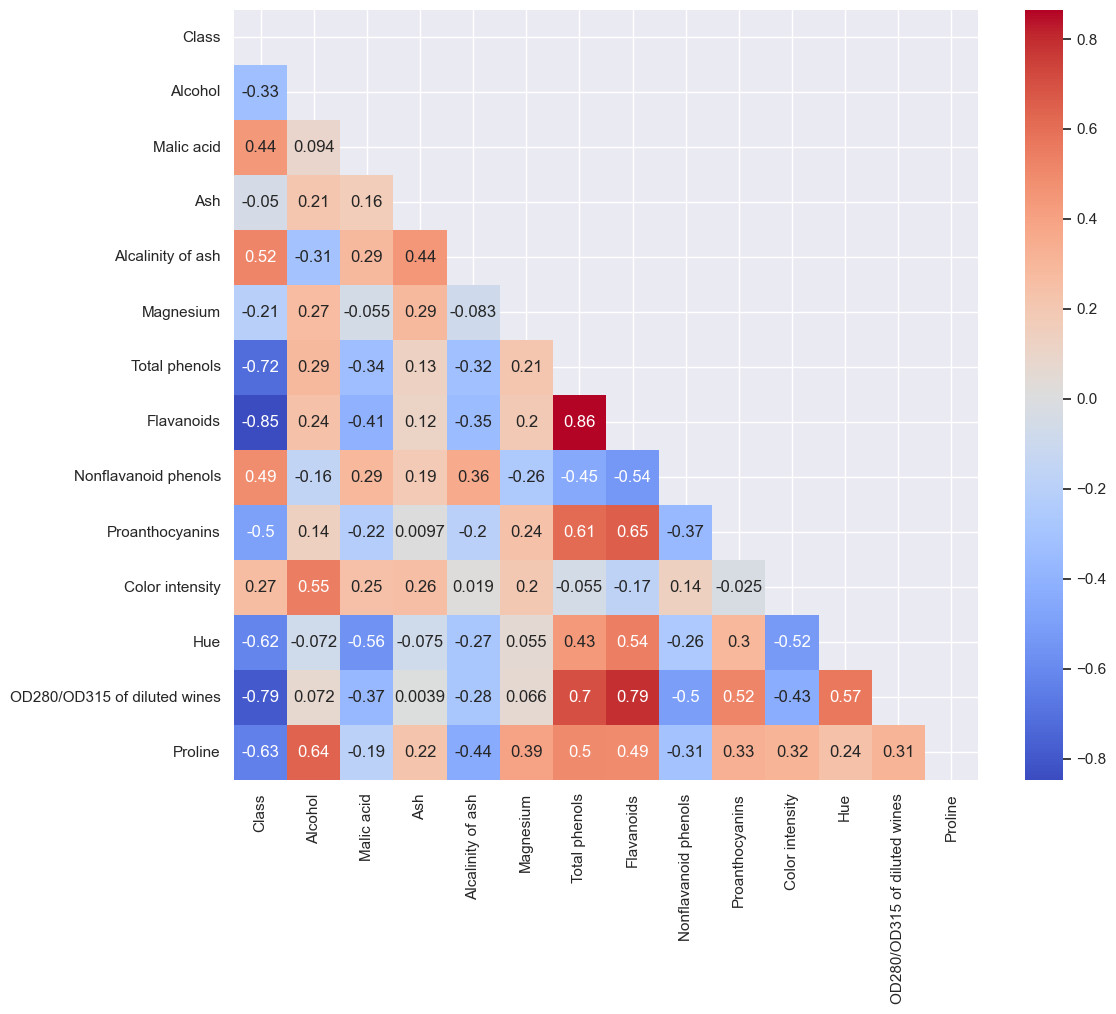

In [509]:
wine_corr = df.corr() # Calculo la matriz de correlación:
mask = np.triu(np.ones_like(wine_corr, dtype=bool)) # Creo una máscara para ocultar la mitad superior de la matriz

plt.figure(figsize=(12, 10))

# Crea el mapa de calor con la máscara
sns.heatmap(wine_corr, annot=True, cmap='coolwarm', mask=mask)
plt.show()

- Observamos que las variables más relacionadas con nuestro target "Class" son: "Flavanoids", "OD280/OD315 of diluted wines" y "Total phenols'", en este orden y negativamente.
- Por otro lado, las variables que se relacionan mucho entre ellas y positivamente son: "Flavanoids", "OD280/OD315 of diluted wines" y "Total phenols"  (motivo por el cual también las tres lo hacen con Class).

Voy a Crear un scatterplot tridimensional para ver la relación de las 3 variables con correlación alta con el target.

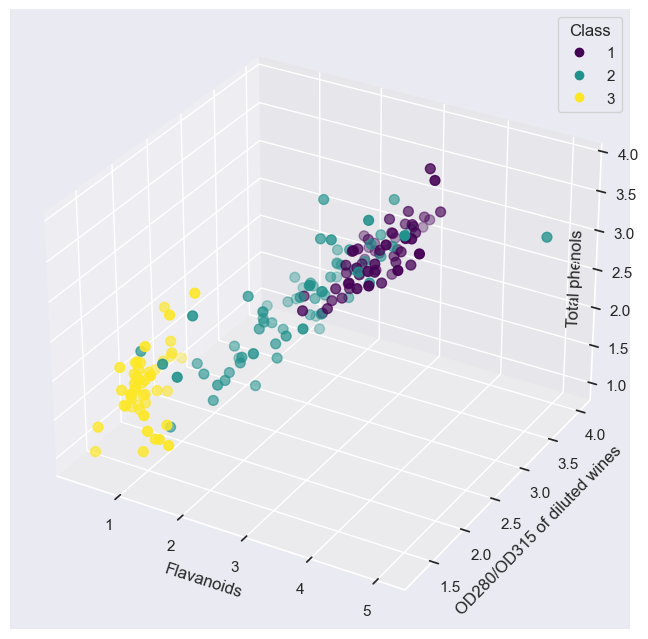

In [510]:
# Definir el estilo de seaborn
sns.set(style="darkgrid")

# Crear un gráfico de dispersión tridimensional
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d') #(111=nrows, ncols, plot_number)
ax.zaxis.labelpad = -30

# Crear un scatterplot tridimensional
scatter = ax.scatter(df['Flavanoids'], df['OD280/OD315 of diluted wines'], df['Total phenols'], c=df['Class'], cmap='viridis', s=50)

# Añadir leyenda y etiquetas
ax.set_xlabel('Flavanoids')
ax.set_ylabel('OD280/OD315 of diluted wines')
ax.set_zlabel('Total phenols')
ax.legend(*scatter.legend_elements(), title='Class')

plt.show()


En este scatterplot tridimensional, vemos claramente la relación de las tres clases de vino con las variables elegidas, que son las que tenían una alta correlación. Entonces deducimos que a mayor clase de vino , menos cantidad de (Flavanoides, D280 y total Flavanoides). La clase 1 es la que tiene mayor cantidad de (Flavanoides, D280 y total Flavanoides) y la clase 3 la que menos.

Para ver si hay equilibrio entre las variables, hago un histograma de cada variable, donde puedo ver la cantidad de datos por rangos numéricos:

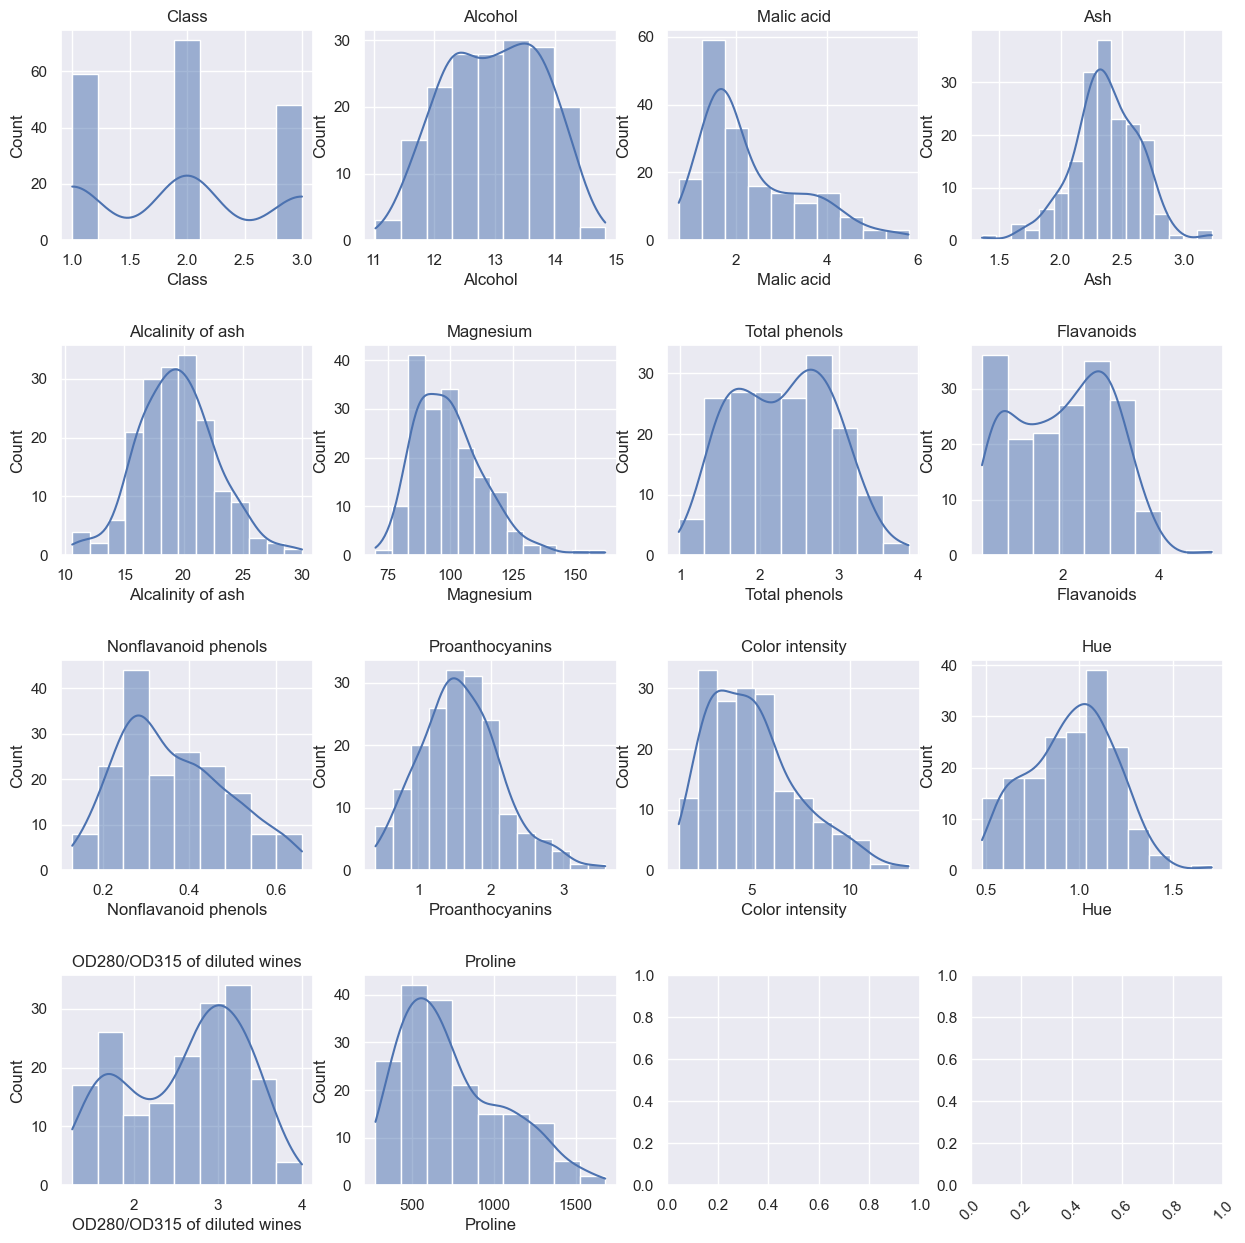

In [511]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Iterar sobre las variables y dibujar histogramas
for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axes[i // 4, i % 4], kde=True)
    axes[i // 4, i % 4].set_title(column)

plt.xticks(rotation=45)
plt.show()

- En Class, vemos que la distribución de las 3 categorías está bastante equilibrada.
- En alcohol, la mayoría de datos estan en alcoholes altos, con alguna excepción de algún vino puntual con menos alcohol y alguna excepción en vinos de mucha más graduación.
- Hay una gran cantidad de vinos centrada en un ácido málico entre 1º y 2º. Pero también vemos una gran cantidad de vinos entre 2 y el 6.
- La curva de Ash es muy curiosa porque se distribuye en valores muy diferenciados entre la mayoría de vinos con valores centrales y algunos casos sueltos con valores bastante bajos.
- Alcalinidad de Ash con valores bastante centrados en valores medios.
- En el caso del Magnesio, la mayoría de datos se centran en valores bajos.
- En fenoles y flavanoides, los datos están distribuidos con partes iguales entre el 0 y 3.

En general las curvas estan bastante descentradas hacia los valores bajos.


Vamos a comprobar: 
- Qué variables siguen una distribución normal y cuales no a fin de saber qué procesos aplicar.
- Qué variables tienen outliers (valores atípicos).

In [117]:
variables_normales = []
variables_no_normales = []

for data in df.columns:
    shapiro_test = stats.shapiro(df[data])
    p_value_rounded = round(shapiro_test.pvalue, 3)
    print("El P-value de", data, "es:", p_value_rounded)
    
    if p_value_rounded < 0.05:
        variables_no_normales.append(data)
    else:
        variables_normales.append(data)

print("\nRESUMEN:")
print("VARIABLES CON DISTRIBUCIÓN NORMAL:\n", '\n'.join(variables_normales))
print("\nVARIABLES SIN DISTRIBUCIÓN NORMAL:\n", '\n'.join(variables_no_normales))



El P-value de Class es: 0.0
El P-value de Alcohol es: 0.02
El P-value de Malic acid es: 0.0
El P-value de Ash es: 0.039
El P-value de Alcalinity of ash es: 0.264
El P-value de Magnesium es: 0.0
El P-value de Total phenols es: 0.004
El P-value de Flavanoids es: 0.0
El P-value de Nonflavanoid phenols es: 0.0
El P-value de Proanthocyanins es: 0.014
El P-value de Color intensity es: 0.0
El P-value de Hue es: 0.017
El P-value de OD280/OD315 of diluted wines es: 0.0
El P-value de Proline es: 0.0

RESUMEN:
VARIABLES CON DISTRIBUCIÓN NORMAL:
 Alcalinity of ash

VARIABLES SIN DISTRIBUCIÓN NORMAL:
 Class
Alcohol
Malic acid
Ash
Magnesium
Total phenols
Flavanoids
Nonflavanoid phenols
Proanthocyanins
Color intensity
Hue
OD280/OD315 of diluted wines
Proline


- Hacemos un boxplot de las variables por separado a fin de detectar los valores atípicos:

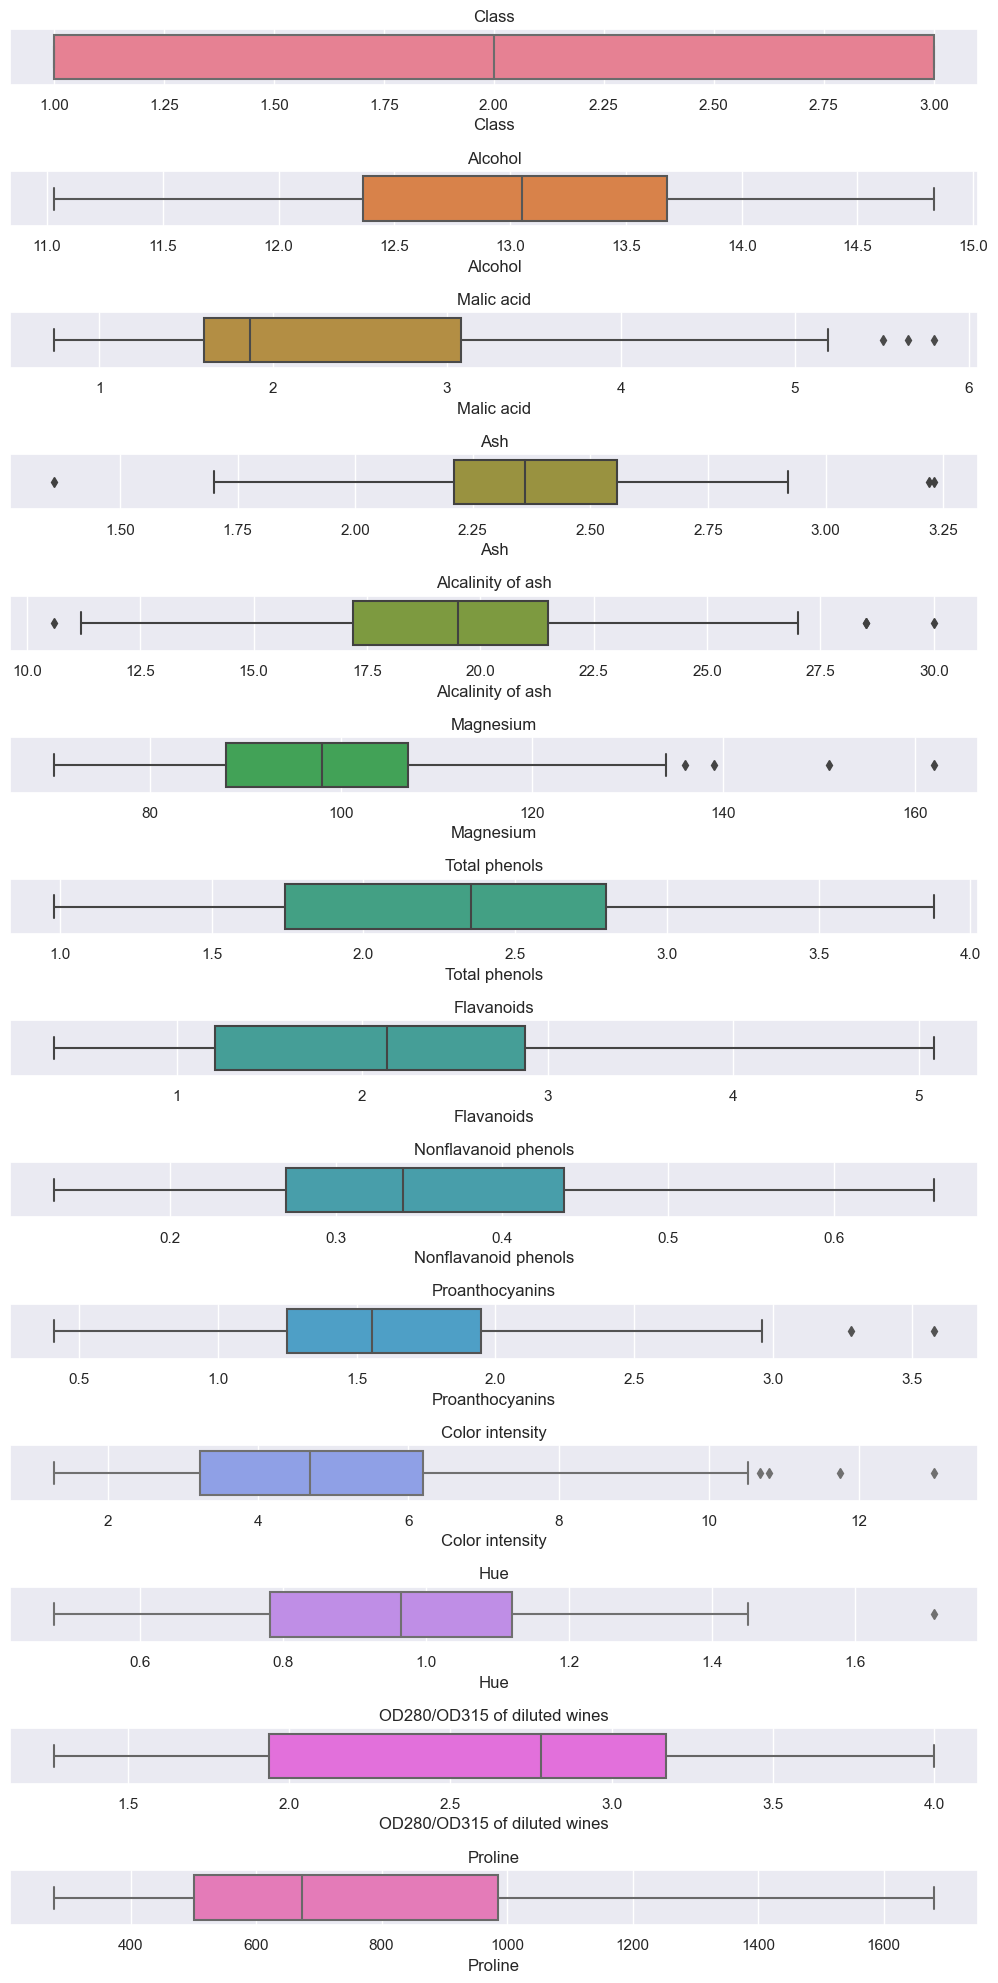

In [513]:
plt.figure(figsize=(20, 20))
palette = sns.color_palette("husl", n_colors=14)

for i, column in enumerate(df.columns):
    plt.subplot(14, 2, 2*i + 1)
    sns.boxplot(x=df[column], orient="h",color=palette[i])
    plt.title(f'{column}')
    plt.tight_layout()

- Observamos que las variables ['Malic acid','Ash', 'Magnesium','Proanthocyanins', 'Color intensity', 'Hue'] tienen valores atípicos (Outliers) y seguían distribución no normal

- La variable 'Alcalinity of ash', sigue distribución normal con outliers.

- Las variables ['Class', 'Alcohol','Total phenols', 'Flavanoids', 'Nonflavanoid phenols','OD280/OD315 of diluted wines', 'Proline'], no tienen valores atípicos y seguían distriución no normal.

- La variable Class, es la étiqueta.

### EXERCICI 5 ### 

Con estos resultados aplicaremos tres procesos de enginiería para mejorar los resultados: 
- **Estandarización** para la variable "Alcalinity of ash", puesto que es útil cuando las características siguen una distribución normal.
- **RobustScaler** a las variables que no tienen distribución normal pero tienen outliers.
- **Minmax**: a las variables que no tienen distribución normal y tampoco tienen tienen outliers.
- **LabelEncoder**, lo necesito para poder usar el XGBoos, puesto que me pide cambiar mis categorías [1,2,3] a [0,1,2].

In [118]:
col_robust = ['Malic acid', 'Ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']
scaler = RobustScaler() # Inicializar el escalador robusto
df[col_robust] = scaler.fit_transform(df[col_robust]) # Aplicar el escalado solo a las columnas seleccionadas

In [119]:
col_minmax = ['Alcohol','Total phenols', 'Flavanoids', 'Nonflavanoid phenols','OD280/OD315 of diluted wines', 'Proline']
scaler = MinMaxScaler()
df[col_minmax] = scaler.fit_transform(df[col_minmax])

In [120]:
scaler = StandardScaler()
df['Alcalinity of ash'] = scaler.fit_transform(df['Alcalinity of ash'].values.reshape(-1, 1))

In [121]:
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

- Observamos los valores resultantes con el escalado aplicado:

In [122]:
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,0.84,-0.10,0.20,-1.17,1.53,0.63,0.57,0.28,1.05,0.32,0.22,0.97,0.56
1,0,0.57,-0.06,-0.63,-2.49,0.11,0.58,0.51,0.25,-0.39,-0.10,0.25,0.78,0.55
2,0,0.56,0.33,0.89,-0.27,0.16,0.63,0.61,0.32,1.79,0.33,0.19,0.70,0.65
3,0,0.88,0.06,0.40,-0.81,0.79,0.99,0.66,0.21,0.89,1.04,-0.31,0.80,0.86
4,0,0.58,0.49,1.47,0.45,1.05,0.63,0.50,0.49,0.38,-0.12,0.22,0.61,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2,0.71,2.56,0.26,0.30,-0.16,0.24,0.06,0.74,-0.71,1.01,-0.96,0.17,0.33
174,2,0.62,1.38,0.35,1.05,0.21,0.28,0.09,0.57,-0.21,0.88,-0.79,0.11,0.34
175,2,0.59,1.63,-0.29,0.15,1.16,0.21,0.07,0.57,-0.29,1.85,-1.11,0.11,0.40
176,2,0.56,0.49,0.03,0.15,1.16,0.23,0.07,0.75,-0.14,1.55,-1.08,0.13,0.40


## Exercici 1 y 2 ##
- Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.
- Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

***Consideraciones clave para elegir modelo***:

1.- Tipo de Problema: Clasificación o Regresión: 
- Problema de clasificación (predicción de **clases discretas**). SERÍA NUESTRO CASO
- Problema de regresión (predicción de **valores continuos**).

2.- Tamaño del Conjunto de Datos: Número de Instancias y Características:
- Conjuntos de datos grandes/pequeños. EN NUESTRO CASO ES UNA BASE DE DATOS MUY PEQUEÑA

3.- Distribución de las Clases: Balance de Clases:
- Clases en tu conjunto de datos están desequilibradas. COMPROBAREMOS SOBRETODO EL EQUILIBRIO EN TARGET.

4.- Naturaleza de las Características: 
- características **categóricas**. TENEMOS UNA VARIABLE TARGET CATEGÓRICA (por lo que es clasificación supervisada).
- características **numéricas**. EL RESTO DE VARIABLES SON NUMÉRICAS.

5.- Interpretabilidad del Modelo:
- Fácilmente interpretable (como árboles de decisión). CREO QUE ES FÁCILMENTE INTERPRETABLE GRACIAS AL TARGET.
- o Priorizar la precisión (sin preocuparte demasiado por la interpretación).

6.- Tiempo de Entrenamiento y Predicción: Eficiencia:
Si hay restricciones de tiempo, mejor usar modelos más eficientes en términos de tiempo de entrenamiento y predicción.

7.- Manejo de Características Ausentes: 
- Datos Faltantes: HEMOS COMPROBADO Y NO HAY NULS, NANS, NI DUPLICADOS.

8.- Tolerancia al Ruido: Sensibilidad al Ruido:
- modelos sensibles al ruido en los datos. LO VEREMOS MÁS ADELANTE.

9.- Requerimientos de Memoria: Recursos del Sistema: 
- Modelos más complejos pueden requerir más recursos de memoria y poder computacional. AL SER BASE DE DATOS PEQUEÑA Y EJERCICIOS MUY BÁSICOS, NO CREO QUE TENGAMOS NINGÚN PROBLEMA DE MEMORIA. 

10.- Sobreajuste: Complejidad del Modelo:
- Considera el riesgo de sobreajuste, especialmente si tienes un conjunto de datos relativamente pequeño. MUY IMPORTANTE EN ESTE CASO AL SER BASE DE DATOS PEQUEÑA.

Como el ejercicio pide definir las clases, estamos ante un problema de CLASIFICACIÓN (Clases discretas, tipoA, tipoB,.. ). 
La cantidad de datos es pequeño (hasta pocos de miles de datos) y en relación al equilibrio... lo veremos ahora. 
Las características són básicamente numéricas, creo que no tiene complejidad de interpretación en lo que es la base de los datos, restricción de tiempo, no. Datos faltantes no hay. Tolerancia al ruido, entiendo que es después de entrenar el modelo. y todos los demás, lo veremos después de aplicar la validación cruzada. 

**TIPOS DE MODELOS DE CLASIFICACIÓN**:

- **Regresión Logística**:
Se utiliza para problemas de clasificación binaria o multiclase ( Multinomial).

- **Máquinas de Soporte Vectorial (SVM)**:
Pueden ser eficaces en la clasificación de conjuntos de datos, usa funciones (kernels) para tratar los datos no lineales. Maximiza el margen de separación entre las clases (mayor separación lineal). 

- **Random Forest**:
Un conjunto de árboles de decisión que puede manejar tanto problemas de clasificación como de regresión. Es robusto y puede capturar patrones complejos.

- **K-Nearest Neighbors (KNN)**:
Clasifica un punto de datos basándose en cómo se clasifican sus vecinos más cercanos.

- **Redes Neuronales**:
Modelos ***más complejos*** que pueden aprender representaciones profundas. Pueden ser eficaces en problemas complejos, pero a menudo requieren más datos.

- **Naive Bayes**:
Basado en el teorema de Bayes y es especialmente efectivo para conjuntos de datos de ***alta dimensionalidad***.

- **Gradient Boosting**:
Técnicas como XGBoost o LightGBM que construyen árboles de decisión en secuencia, corrigiendo los errores de los modelos anteriores.

- **Decision Tree Classifier**:
Los árboles de decisión son fáciles de entender y visualizar porque se pueden seguir las ramas del árbol para entender cómo se toman las decisiones.
No requiere escalado de características antes de usar un árbol de decisión, ya que no depende de la magnitud de las variables.
Nos puede dar problemas de sobreajuste, pero se puede ajustar la profundidad máxima y otros hiperparámetros para evitar el sobreajuste.

**TIPOS EVALUACIÓN DE RENDIMIENTO**:

   **- RENDIMIENTO ESPECÍFICO**:

**Exactitud (Accuracy)**: métrica comúnmente utilizada y fácil de entender. Es la proporción de instancias clasificadas correctamente entre todas las instancias. Puede dar problemas cuando las clases están desequilibradas.

   **- RENDIMIENTO AVANZADO**:

**Precision:** se centra en las instancias que el modelo clasifica como positivas.

**Recall**: se centra en la capacidad del modelo para capturar todas las instancias positivas y es útil cuando el costo de los falsos negativos es alto.

**Puntuación F1 (Score)**: Nos muestra el equilibrio entre precisión y recall.

**Specificity (Especificidad)**: Mide la capacidad del modelo para clasificar correctamente instancias negativas.Útil cuando el énfasis está en la identificación correcta de instancias negativas

**Matriz de Confusión**: Tabla que describe el rendimiento del modelo en términos de verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN). Cada fila de la matriz representa las instancias en una clase predicha, mientras que cada columna representa las instancias en una clase real.

**Area Under the ROC Curve (AUC-ROC)**: Representa el área bajo la curva ROC (Receiver Operating Characteristic). Muestra la tasa de verdaderos positivos frente a la tasa de falsos positivos para diferentes umbrales de decisión. AUC-ROC cercano a 1 se considera bueno.

**Area Under the Precision-Recall Curve (AUC-PR)**: Representa el área bajo la curva precisión-recuperación. Mide el rendimiento del modelo en términos de precisión y recuperación para diferentes umbrales de decisión.

**Log Loss**: Mide la discrepancia entre las probabilidades predichas por el modelo y las etiquetas reales. Específicamente útil para modelos que proporcionan probabilidades de clase en lugar de predicciones de clase.

**Matthews Correlation Coefficient (MCC)**: Mide la calidad general de una clasificación binaria. Toma valores entre -1 y 1, donde 1 indica una predicción perfecta.

Doy nombre a la variable objetivo que en este caso es clase de vino y dividimos los datos en train (80%) y test (20%). 

In [123]:
X = df.drop('Class', axis=1)  # Características, variables de los vinos.
y = df['Class']  # Target class de vinos.

DIVISIÓN DE DATOS PARA EL TRAIN Y EL TEST, y esta vez, añado el parámetro: stratify, para asegurarme de que se selecciona la misma cantidad por clase de vino a la hora de dividir los datos para entrenar y test.

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# aplico stratify para que me coga la misma cantidad de datos de cada clase del target.
print("Datos en X_train:", X_train.shape[0], "Datos en X_test:", X_test.shape[0])
print("Datos en y_train:", y_train.shape[0], "Datos en y_test:", y_test.shape[0])

Datos en X_train: 142 Datos en X_test: 36
Datos en y_train: 142 Datos en y_test: 36


In [125]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ajustamos modelo a nuestros datos X y y:
model = sm.OLS(X, y)

# calculamos factor de inflación:
VIF = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print(VIF)

[14.818845991762844, 1.9525234948472188, 1.7249874514148948, 2.0137638356602707, 1.381404025203152, 23.175345025580622, 25.79866961565245, 4.231710949434967, 1.7842076638094229, 3.0427959061514143, 2.3863236393760254, 16.24039487648071, 9.028418632502898]


Un valor superior a 5 o 10 indica una alta multicolinealidad.
La encontramos en algunas variables y nos pueden afectar negativamente  a los resultados:
La primera variable ('Alcohol'), tiene un VIF de 14.82.
La sexta variable ('Total phenols') tiene un VIF de 23.18.
La séptima variable ('Flavanoids') tiene un VIF de 25.80.
La duodécima variable ('OD280/OD315 of diluted wines') tiene un VIF de 16.24.

debo valorar si eliminar alguna que sea redundante, transformarlas en:
- LOGARÍTMICA:
columna = 'Alcohol'
df[columna + '_log'] = np.log(df[columna])

- CUADRÁTICA: 
df[columna + '_cuadratica'] = np.square(df[columna])

In [126]:
# Transformación logarítmica (añado 1p en Log porque daba problemas al ser número cercano al 0)
df['Alcohol_log'] = np.log1p(df['Alcohol'])
df['Total_phenols_log'] = np.log1p(df['Total phenols'])
df['Flavanoids_log'] = np.log1p(df['Flavanoids'])
df['OD280_OD315_log'] = np.log1p(df['OD280/OD315 of diluted wines'])

# Transformación cuadrática
df['Alcohol_squared'] = np.square(df['Alcohol'])
df['Total_phenols_squared'] = np.square(df['Total phenols'])
df['Flavanoids_squared'] = np.square(df['Flavanoids'])
df['OD280_OD315_squared'] = np.square(df['OD280/OD315 of diluted wines'])

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

columnas_transformadas = [
    'Alcohol_log', 'Total_phenols_log', 'Flavanoids_log', 'OD280_OD315_log',
    'Alcohol_squared', 'Total_phenols_squared', 'Flavanoids_squared', 'OD280_OD315_squared'
]

# Selecciona las variables transformadas
X_transformado = df[columnas_transformadas]

# Calcula el VIF para cada variable transformada
vif_data_transformado = pd.DataFrame()
vif_data_transformado["Variable"] = columnas_transformadas
vif_data_transformado["VIF"] = [variance_inflation_factor(X_transformado.values, i) for i in range(X_transformado.shape[1])]

# Muestra los resultados
print(vif_data_transformado)

                Variable   VIF
0            Alcohol_log 47.66
1      Total_phenols_log 86.06
2         Flavanoids_log 63.13
3        OD280_OD315_log 65.89
4        Alcohol_squared 22.66
5  Total_phenols_squared 31.63
6     Flavanoids_squared 23.77
7    OD280_OD315_squared 23.62


- Como vemos, han empeorado los valores VIF. Con lo cual, procedo a aplicar los modelos y ya posteriormente valoraré con el cross validation si los resultados són óptimos.

## MODELOS, ENTRENAMIENTO, PREDICCIÓN Y EVALUACIÓN : ##

**MODELOS DE ENTRENAMIENTO Y PREDICCIÓN**:
He valorado los siguientes modelos:

- DTC
- RandomForestClassifier
- KNeighborsClassifier
- LogisticRegression
- SVC
- Naives 
- Neuronal
- XGboostClassifier

He descartado:

- Ridge: uso más común en egresión pero se puede usar actualmente para clasificación. No lo usaré.
- lasso_model: no lo usaremos porque ya que Lasso no predice directamente clases en el mismo sentido que los modelos de clasificación. Ajusta los parámetros y el preprocesamiento según se necesite.
- lgb_model = lgb.LGBMClassifier() . Al final, no pruebo este modelo por problemas de memoria. 


**MODELOS DE EVALUACIÓN ELEGIDOS:**

1.- Evaluación de Rendimiento Específico:

**Exactitud (Accuracy)**:  métrica comúnmente utilizada y fácil de entender. Es la proporción de instancias clasificadas correctamente entre todas las instancias. Puede dar problemas cuando las clases están desequilibradas.

2.- Evaluación de Rendimiento Avanzado:
**Precision**: se centra en las instancias que el modelo clasifica como positivas.

**Recall**:  se centra en la capacidad del modelo para capturar todas las instancias positivas y es útil cuando el costo de los falsos negativos es alto. 

**Puntuación F1 (Score)**: Nos muestra el equilibrio entre **precisión y recall**.

**Specificity (Especificidad)**: Mide la capacidad del modelo para clasificar correctamente instancias negativas.Útil cuando el énfasis está en la identificación correcta de instancias negativas

**Matriz de Confusión**: Tabla que describe el rendimiento del modelo en términos de verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN). Cada fila de la matriz representa las instancias en una clase predicha, mientras que cada columna representa las instancias en una clase real.

**MODELOS DE EVALUACIÓN DESCARTADOS EN EL PRIMER ENTRENAMIENTO**:

**Area Under the ROC Curve (AUC-ROC)**: Representa el área bajo la curva ROC (Receiver Operating Characteristic). Muestra la tasa de verdaderos positivos frente a la tasa de falsos positivos para diferentes umbrales de decisión. AUC-ROC cercano a 1 se considera bueno.

**Area Under the Precision-Recall Curve (AUC-PR)**: Representa el área bajo la curva precisión-recuperación.
Mide el rendimiento del modelo en términos de precisión y recuperación para diferentes umbrales de decisión.

**Log Loss**: Mide la discrepancia entre las probabilidades predichas por el modelo y las etiquetas reales.
Específicamente útil para modelos que proporcionan probabilidades de clase en lugar de predicciones de clase.

**Matthews Correlation Coefficient (MCC)**: Mide la calidad general de una clasificación binaria. Toma valores entre -1 y 1, donde 1 indica una predicción perfecta.

- Voy a elegir varios modelos y aplicaré en cada uno de ellos sus predicciones.
- En cada uno de ellos valoraré el rendimiento con los modelos de evaluación más comunes. 
- Entre estos realizaré la matriz de confusión y las compararé.

In [128]:
print ('MODELO: DECISION TREE''\n')
# Inicializar el modelo decision tree
DTC = DecisionTreeClassifier()

# Entrenar el modelo Decision Tree
DTC.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_DTC = DTC.predict(X_test)

# Evaluar el rendimiento del modelo Decision Tree
accuracy_dtc = accuracy_score(y_test, y_pred_DTC)
precision_dtc = precision_score(y_test, y_pred_DTC, average='weighted')
recall_dtc = recall_score(y_test, y_pred_DTC, average='weighted')
f1_dtc = f1_score(y_test, y_pred_DTC, average='weighted')

# Calcular la matriz de confusión
conf_matrix_dtc = confusion_matrix(y_test, y_pred_DTC)
tn, fp, fn, tp = conf_matrix_dtc[0, 0], conf_matrix_dtc[0, 1], conf_matrix_dtc[1, 0], conf_matrix_dtc[1, 1]

# Definir la función de especificidad y Calcular la especificidad
def specificity(true_negative, false_positive, false_negative, true_positive):
    return true_negative / (true_negative + false_positive)
specificity_dtc = specificity(tn, fp, fn, tp)

print("Accuracy (Decision Tree):", accuracy_dtc)
print("Precision (Decision Tree):", precision_dtc)
print("Recall (Decision Tree):", recall_dtc)
print("F1 Score (Decision Tree):", f1_dtc,"\n")
print("Matriz de Confusión (Decision Tree):")
print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)
print("Especificidad (Decision Tree):", specificity_dtc,"\n")
print("Predicciones DTC:", y_pred_DTC[0:10])

MODELO: DECISION TREE

Accuracy (Decision Tree): 0.9722222222222222
Precision (Decision Tree): 0.974074074074074
Recall (Decision Tree): 0.9722222222222222
F1 Score (Decision Tree): 0.972097284690988 

Matriz de Confusión (Decision Tree):
True Negative: 11
False Positive: 1
False Negative: 0
True Positive: 14
Especificidad (Decision Tree): 0.9166666666666666 

Predicciones DTC: [0 2 0 1 1 0 0 1 1 2]


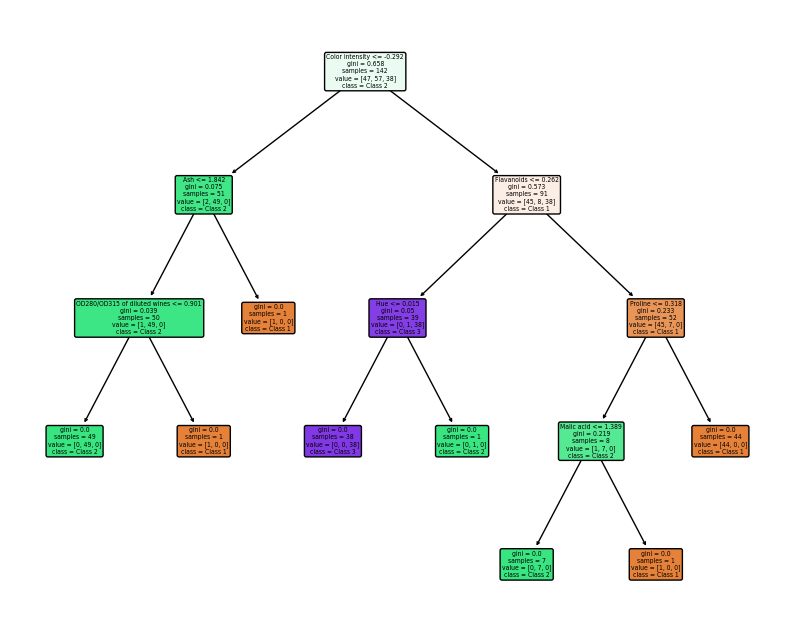

In [129]:
# Visualizar el árbol de decisión
plt.figure(figsize=(10, 8))
plot_tree(DTC, filled=True, feature_names=X_train.columns, class_names=["Class 1", "Class 2", "Class 3"], rounded=True)
plt.show()

- Este esquema nos ayuda a entender los caminos y las decisiones tomadas por el Decision Tree. Aunque al final lo que nos importa son los resultados.

Sigo con el modelo Random Forest Classiier:

In [130]:
print ('MODELO: RANDOM FOREST CLASSIFIER''\n')
# Inicializar el modelo
rf_model = RandomForestClassifier()

# Entrenar modelo Random Forest
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Calcular la matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
tn_rf, fp_rf, fn_rf, tp_rf = conf_matrix_rf[0, 0], conf_matrix_rf[0, 1], conf_matrix_rf[1, 0], conf_matrix_rf[1, 1]

# Calcular la especificidad
def specificity(true_negative, false_positive, false_negative, true_positive):
    return true_negative / (true_negative + false_positive)
specificity_rf = specificity(tn_rf, fp_rf, fn_rf, tp_rf)

print("Accuracy (Random Forest):", accuracy_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1 Score (Random Forest):", f1_rf,"\n")
print("Matriz de Confusión (Random Forest):")
print("True Negative:", tn_rf)
print("False Positive:", fp_rf)
print("False Negative:", fn_rf)
print("True Positive:", tp_rf)
print("Especificidad (Random Forest):", specificity_rf,"\n")
print("Predicciones Random Forest:", y_pred_rf[0:10])

MODELO: RANDOM FOREST CLASSIFIER

Accuracy (Random Forest): 1.0
Precision (Random Forest): 1.0
Recall (Random Forest): 1.0
F1 Score (Random Forest): 1.0 

Matriz de Confusión (Random Forest):
True Negative: 12
False Positive: 0
False Negative: 0
True Positive: 14
Especificidad (Random Forest): 1.0 

Predicciones Random Forest: [0 2 0 1 1 0 0 1 1 2]


In [131]:
print ('MODELO: K-NEAREST NEIGHBORS''\n')

# Inicializar el modelo K-Nearest Neighbors
knn = KNeighborsClassifier()

# Entrenar el modelo K-Nearest Neighbors
knn.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_knn = knn.predict(X_test)

# Evaluar el rendimiento del modelo K-Nearest Neighbors
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Calcular la matriz de confusión
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
tn_knn, fp_knn, fn_knn, tp_knn = conf_matrix_knn[0, 0], conf_matrix_knn[0, 1], conf_matrix_knn[1, 0], conf_matrix_knn[1, 1]

# Calcular la especificidad
def specificity(true_negative, false_positive, false_negative, true_positive):
    return true_negative / (true_negative + false_positive)
specificity_knn = specificity(tn_knn, fp_knn, fn_knn, tp_knn)

print("Accuracy (K-Nearest Neighbors):", accuracy_knn)
print("Precision (K-Nearest Neighbors):", precision_knn)
print("Recall (K-Nearest Neighbors):", recall_knn)
print("F1 Score (K-Nearest Neighbors):", f1_knn,"\n")
print("Matriz de Confusión (K-Nearest Neighbors):")
print("True Negative:", tn_knn)
print("False Positive:", fp_knn)
print("False Negative:", fn_knn)
print("True Positive:", tp_knn)
print("Especificidad (K-Nearest Neighbors):", specificity_knn,"\n")
print("Predicciones K-Nearest Neighbors:", y_pred_knn[0:10])

MODELO: K-NEAREST NEIGHBORS

Accuracy (K-Nearest Neighbors): 0.7777777777777778
Precision (K-Nearest Neighbors): 0.7986111111111112
Recall (K-Nearest Neighbors): 0.7777777777777778
F1 Score (K-Nearest Neighbors): 0.7780491113824448 

Matriz de Confusión (K-Nearest Neighbors):
True Negative: 11
False Positive: 1
False Negative: 5
True Positive: 9
Especificidad (K-Nearest Neighbors): 0.9166666666666666 

Predicciones K-Nearest Neighbors: [0 1 0 0 1 0 0 0 1 2]


In [132]:
print ('LOGISTIC REGRESSION')

# Inicializar el modelo Logistic Regression
logistic_reg = LogisticRegression(max_iter=1000)

# Entrenar el modelo Logistic Regression
logistic_reg.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_logistic = logistic_reg.predict(X_test)

# Evaluar el rendimiento del modelo Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')

# Calcular la matriz de confusión
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
tn_logistic, fp_logistic, fn_logistic, tp_logistic = conf_matrix_logistic[0, 0], conf_matrix_logistic[0, 1], conf_matrix_logistic[1, 0], conf_matrix_logistic[1, 1]

# Calcular la especificidad
def specificity(true_negative, false_positive, false_negative, true_positive):
    return true_negative / (true_negative + false_positive)
specificity_logistic = specificity(tn_logistic, fp_logistic, fn_logistic, tp_logistic)

print("Accuracy (Logistic Regression):", accuracy_logistic)
print("Precision (Logistic Regression):", precision_logistic)
print("Recall (Logistic Regression):", recall_logistic)
print("F1 Score (Logistic Regression):", f1_logistic,"\n")
print("Matriz de Confusión (Logistic Regression):")
print("True Negative:", tn_logistic)
print("False Positive:", fp_logistic)
print("False Negative:", fn_logistic)
print("True Positive:", tp_logistic)
print("Especificidad (Logistic Regression):", specificity_logistic,"\n")
print("Predicciones Logistic Regression:", y_pred_logistic[0:10])

LOGISTIC REGRESSION
Accuracy (Logistic Regression): 0.8888888888888888
Precision (Logistic Regression): 0.8879392212725546
Recall (Logistic Regression): 0.8888888888888888
F1 Score (Logistic Regression): 0.8872514619883042 

Matriz de Confusión (Logistic Regression):
True Negative: 12
False Positive: 0
False Negative: 1
True Positive: 12
Especificidad (Logistic Regression): 1.0 

Predicciones Logistic Regression: [0 1 0 2 1 0 0 1 1 2]


In [133]:
print ('MODELO MAQUINAS DE SOPORTE VECTORIAL\n')
# Inicializar el modelo SVM
svm_model = SVC(kernel='linear')

# Entrenar el modelo SVM
svm_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Evaluar el rendimiento del modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Calcular la matriz de confusión
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
tn_svm, fp_svm, fn_svm, tp_svm = conf_matrix_svm[0, 0], conf_matrix_svm[0, 1], conf_matrix_svm[1, 0], conf_matrix_svm[1, 1]

# Calcular la especificidad
def specificity(true_negative, false_positive, false_negative, true_positive):
    return true_negative / (true_negative + false_positive)
specificity_svm = specificity(tn_svm, fp_svm, fn_svm, tp_svm)

print("Accuracy (SVM):", accuracy_svm)
print("Precision (SVM):", precision_svm)
print("Recall (SVM):", recall_svm)
print("F1 Score (SVM):", f1_svm,"\n")
print("Matriz de Confusión (SVM):")
print("True Negative:", tn_svm)
print("False Positive:", fp_svm)
print("False Negative:", fn_svm)
print("True Positive:", tp_svm)
print("Especificidad (SVM):", specificity_svm,"\n")
print("Predicciones SVM:", y_pred_svm[0:10])

MODELO MAQUINAS DE SOPORTE VECTORIAL

Accuracy (SVM): 0.8888888888888888
Precision (SVM): 0.8968253968253967
Recall (SVM): 0.8888888888888888
F1 Score (SVM): 0.8879392212725546 

Matriz de Confusión (SVM):
True Negative: 12
False Positive: 0
False Negative: 2
True Positive: 12
Especificidad (SVM): 1.0 

Predicciones SVM: [0 1 0 0 1 0 0 1 1 2]


In [134]:
print ('MODELO DE NAIVE BAYES')
# Inicializar el modelo Naive Bayes
nb_model = GaussianNB()

# Entrenar el modelo Naive Bayes
nb_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_nb = nb_model.predict(X_test)

# Evaluar el rendimiento del modelo Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Calcular la matriz de confusión
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
tn_nb, fp_nb, fn_nb, tp_nb = conf_matrix_nb[0, 0], conf_matrix_nb[0, 1], conf_matrix_nb[1, 0], conf_matrix_nb[1, 1]

# Calcular la especificidad
def specificity(true_negative, false_positive, false_negative, true_positive):
    return true_negative / (true_negative + false_positive)
specificity_nb = specificity(tn_nb, fp_nb, fn_nb, tp_nb)

print("Accuracy (Naive Bayes):", accuracy_nb)
print("Precision (Naive Bayes):", precision_nb)
print("Recall (Naive Bayes):", recall_nb)
print("F1 Score (Naive Bayes):", f1_nb,"\n")
print("Matriz de Confusión (Naive Bayes):")
print("True Negative:", tn_nb)
print("False Positive:", fp_nb)
print("False Negative:", fn_nb)
print("True Positive:", tp_nb)
print("Especificidad (Naive Bayes):", specificity_nb,"\n")
print("Predicciones Naive Bayes:", y_pred_nb[0:10])

MODELO DE NAIVE BAYES
Accuracy (Naive Bayes): 0.9722222222222222
Precision (Naive Bayes): 0.9743589743589745
Recall (Naive Bayes): 0.9722222222222222
F1 Score (Naive Bayes): 0.9722633744855967 

Matriz de Confusión (Naive Bayes):
True Negative: 12
False Positive: 0
False Negative: 1
True Positive: 13
Especificidad (Naive Bayes): 1.0 

Predicciones Naive Bayes: [0 2 0 1 1 0 0 0 1 2]


In [135]:
print ('MODELO NEURAL NETWORK\n')
# Inicializar el modelo Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)

# Entrenar el modelo Neural Network
nn_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_nn = nn_model.predict(X_test)

# Evaluar el rendimiento del modelo Neural Network
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn, average='weighted')
recall_nn = recall_score(y_test, y_pred_nn, average='weighted')
f1_nn = f1_score(y_test, y_pred_nn, average='weighted')

# Calcular la matriz de confusión
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
tn_nn, fp_nn, fn_nn, tp_nn = conf_matrix_nn[0, 0], conf_matrix_nn[0, 1], conf_matrix_nn[1, 0], conf_matrix_nn[1, 1]

# Calcular la especificidad
def specificity(true_negative, false_positive, false_negative, true_positive):
    return true_negative / (true_negative + false_positive)
specificity_nn = specificity(tn_nn, fp_nn, fn_nn, tp_nn)

print("Accuracy (Neural Network):", accuracy_nn)
print("Precision (Neural Network):", precision_nn)
print("Recall (Neural Network):", recall_nn)
print("F1 Score (Neural Network):", f1_nn,"\n")
print("Matriz de Confusión (Neural Network):")
print("True Negative:", tn_nn)
print("False Positive:", fp_nn)
print("False Negative:", fn_nn)
print("True Positive:", tp_nn)
print("Especificidad (Neural Network):", specificity_nn,"\n")
print("Predicciones Neural Network:", y_pred_nn[0:10])

MODELO NEURAL NETWORK

Accuracy (Neural Network): 0.9166666666666666
Precision (Neural Network): 0.9225071225071224
Recall (Neural Network): 0.9166666666666666
F1 Score (Neural Network): 0.9155725840783313 

Matriz de Confusión (Neural Network):
True Negative: 12
False Positive: 0
False Negative: 1
True Positive: 13
Especificidad (Neural Network): 1.0 

Predicciones Neural Network: [0 1 0 1 1 0 0 1 1 2]


In [136]:
print ('MODELO XGBOOST\n')
# Inicializar el modelo XGBoost
xgb_model = xgb.XGBClassifier()

# Entrenar el modelo XGBoost
xgb_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el rendimiento del modelo XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Calcular la matriz de confusión
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
tn_xgb, fp_xgb, fn_xgb, tp_xgb = conf_matrix_xgb[0, 0], conf_matrix_xgb[0, 1], conf_matrix_xgb[1, 0], conf_matrix_xgb[1, 1]

# Calcular la especificidad
def specificity(true_negative, false_positive, false_negative, true_positive):
    return true_negative / (true_negative + false_positive)
specificity_xgb = specificity(tn_xgb, fp_xgb, fn_xgb, tp_xgb)

print("Accuracy (XGBoost):", accuracy_xgb)
print("Precision (XGBoost):", precision_xgb)
print("Recall (XGBoost):", recall_xgb)
print("F1 Score (XGBoost):", f1_xgb,"\n")
print("Matriz de Confusión (XGBoost):")
print("True Negative:", tn_xgb)
print("False Positive:", fp_xgb)
print("False Negative:", fn_xgb)
print("True Positive:", tp_xgb)
print("Especificidad (XGBoost):", specificity_xgb,"\n")
print("Predicciones XGBoost:", y_pred_xgb[0:10])

MODELO XGBOOST

Accuracy (XGBoost): 0.9722222222222222
Precision (XGBoost): 0.9743589743589745
Recall (XGBoost): 0.9722222222222222
F1 Score (XGBoost): 0.9722633744855967 

Matriz de Confusión (XGBoost):
True Negative: 12
False Positive: 0
False Negative: 1
True Positive: 13
Especificidad (XGBoost): 1.0 

Predicciones XGBoost: [0 2 0 0 1 0 0 1 1 2]


In [137]:
from sklearn.linear_model import RidgeClassifier

# Ridge Model
print ('MODELO RIDGE\n')
ridge_model = RidgeClassifier(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
precision_ridge = precision_score(y_test, y_pred_ridge, average='weighted')
recall_ridge = recall_score(y_test, y_pred_ridge, average='weighted')
f1_ridge = f1_score(y_test, y_pred_ridge, average='weighted')

conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge)
tn_ridge, fp_ridge, fn_ridge, tp_ridge = conf_matrix_ridge[0, 0], conf_matrix_ridge[0, 1], conf_matrix_ridge[1, 0], conf_matrix_ridge[1, 1]

specificity_ridge = specificity(tn_ridge, fp_ridge, fn_ridge, tp_ridge)

print("Accuracy (Ridge):", accuracy_ridge)
print("Precision (Ridge):", precision_ridge)
print("Recall (Ridge):", recall_ridge)
print("F1 Score (Ridge):", f1_ridge,"\n")
print("Matriz de Confusión (Ridge):")
print("True Negative:", tn_ridge)
print("False Positive:", fp_ridge)
print("False Negative:", fn_ridge)
print("True Positive:", tp_ridge)
print("Especificidad (Ridge):", specificity_ridge,"\n")
print("Predicciones Ridge:", y_pred_ridge[0:10])

MODELO RIDGE

Accuracy (Ridge): 1.0
Precision (Ridge): 1.0
Recall (Ridge): 1.0
F1 Score (Ridge): 1.0 

Matriz de Confusión (Ridge):
True Negative: 12
False Positive: 0
False Negative: 0
True Positive: 14
Especificidad (Ridge): 1.0 

Predicciones Ridge: [0 2 0 1 1 0 0 1 1 2]


HAGO DOS GRÁFICAS: 
- LA PRIMERA,  ES LA MATRIZ DE CONFUSIÓN PARA VALORAR: Verdaderos Positivos, Falsos Negativos (FN_i) Y Falsos Positivos (FP_i):
- LA SEGUNDA, UN PLOT MUY BÁSICO PARA VISUALIZAR LOS VALORES.

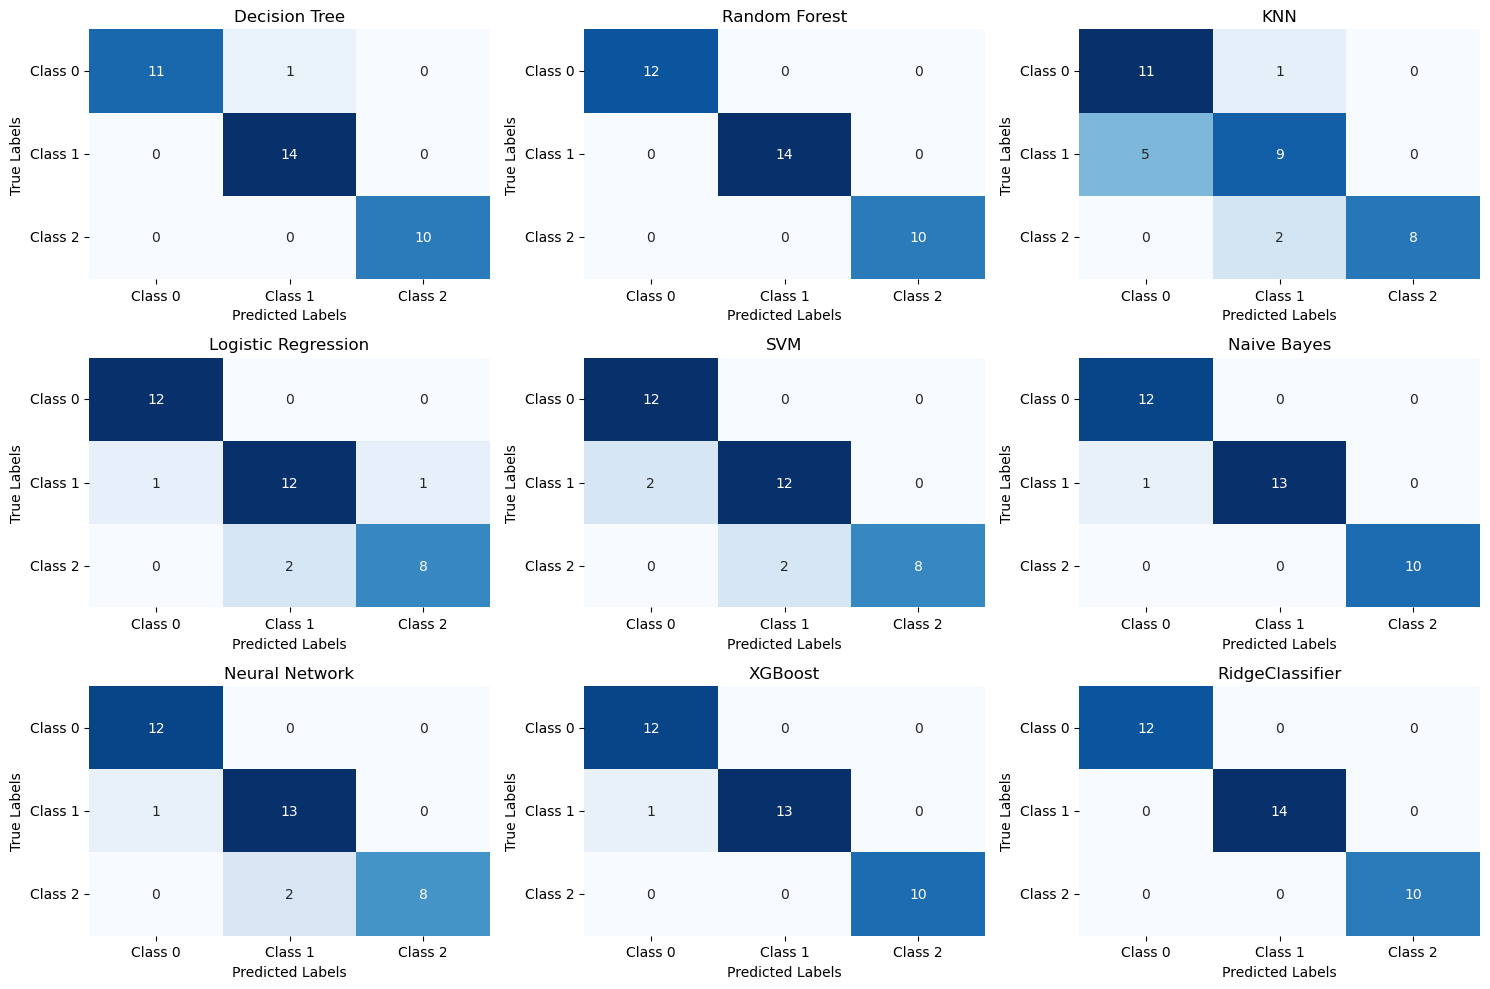

In [138]:
conf_matrices = [conf_matrix_dtc, conf_matrix_rf, conf_matrix_knn, conf_matrix_logistic, conf_matrix_svm, conf_matrix_nb, conf_matrix_nn, conf_matrix_xgb,conf_matrix_ridge]

# Nombres de los modelos:
model_names = ['Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression', 'SVM', 'Naive Bayes', 'Neural Network', 'XGBoost','RidgeClassifier']

# Nombres de las clases (que son las mismas para todos los modelos:
class_names = [f'Class {i}' for i in range(conf_matrices[0].shape[0])]

plt.figure(figsize=(15, 10))

# Crear subgráficos para cada modelo:
for i, conf_matrix in enumerate(conf_matrices, 1):
    plt.subplot(3, 3, i)
    
    # Utilizar Seaborn para visualizar la matriz de confusión
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    
    plt.title(model_names[i - 1])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
    plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0)

plt.tight_layout()
plt.show()

En el contexto de clasificación de tres clases de vino (0, 1, 2), la matriz de confusión tiene la siguiente estructura:

|                 | Predicción A                | Predicción B                 | Predicción C                 |
|-----------------|-----------------------------|------------------------------|------------------------------|
| **Class 0**      | Verdaderos Positivos (TP_0) | Falsos Negativos (FN_0)     | Falsos Negativos (FN_0)     |
| **Class 1**      | Falsos Positivos (FP_1)     | Verdaderos Positivos (TP_1) | Falsos Negativos (FN_1)     |
| **Class 2**      | Falsos Positivos (FP_2)     | Falsos Positivos (FP_2)     | Verdaderos Positivos (TP_2) |

Aquí está la interpretación de cada término:

- **Verdaderos Positivos (TP_i):** Instancias de la clase i correctamente clasificadas como clase i.

- **Falsos Negativos (FN_i):** Instancias de la clase i incorrectamente clasificadas como otras clases distintas de i.

- **Falsos Positivos (FP_i):** Instancias incorrectamente clasificadas como clase i cuando en realidad pertenecían a otras clases distintas de i.


Esta matriz proporciona una visión detallada de cómo el modelo realiza predicciones para cada clase en comparación con las clases reales.

Debemos interpretar los elementos de la diagonal principal, que representan la cantidad de predicciones **correctas** hechas por el modelo, mientras que los elementos fuera de la diagonal principal representan los **errores de clasificación**. 


- Las diagonales con más VERDADEROS POSITIVOS, aparece en los modelos de Ridge Clasifier y Random forest (sin falsos negativos ni positivos), Naive Bayes y XGBoost (obteniendo ambos un falso positivo).

- Los peores resutltados, los ha obtenido el test KNN con diferencia, y con unos resultados regulares, el resto.

Ahora muestro un plot de los resultados de los modelos:

In [139]:
print ('RESULTADOS DE LOS MODELOS ORDENADOS POR EXACTITUD')
results_modelo = {
    'Modelo': ['Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression', 'SVM', 'Naive Bayes', 'Neural Network', 'XGBoost','RidgeClassifier'],
    'Accuracy': [accuracy_dtc, accuracy_rf, accuracy_knn, accuracy_logistic, accuracy_svm, accuracy_nb, accuracy_nn, accuracy_xgb, accuracy_ridge],
    'Precision': [precision_dtc, precision_rf, precision_knn, precision_logistic, precision_svm, precision_nb, precision_nn, precision_xgb, accuracy_ridge],
    'Recall': [recall_dtc, recall_rf, recall_knn, recall_logistic, recall_svm, recall_nb, recall_nn, recall_xgb, recall_ridge],
    'F1 Score': [f1_dtc, f1_rf, f1_knn, f1_logistic, f1_svm, f1_nb, f1_nn, f1_xgb, f1_ridge],
    'Especificidad': [specificity_dtc, specificity_rf, specificity_knn, specificity_logistic, specificity_svm, specificity_nb, specificity_nn, specificity_xgb, specificity_ridge],
}

df_results_modelo = pd.DataFrame(results_modelo)
df_results_modelo.index += 1  # Numerar a partir de 1
df_results_sorted = df_results_modelo.sort_values(by='Accuracy', ascending=False)
df_results_sorted[['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Especificidad']]

RESULTADOS DE LOS MODELOS ORDENADOS POR EXACTITUD


,Modelo,Accuracy,Precision,Recall,F1 Score,Especificidad
2,Random Forest,1.00,1.00,1.00,1.00,1.00
9,RidgeClassifier,1.00,1.00,1.00,1.00,1.00
1,Decision Tree,0.97,0.97,0.97,0.97,0.92
6,Naive Bayes,0.97,0.97,0.97,0.97,1.00
8,XGBoost,0.97,0.97,0.97,0.97,1.00
7,Neural Network,0.92,0.92,0.92,0.92,1.00
4,Logistic Regression,0.89,0.89,0.89,0.89,1.00
5,SVM,0.89,0.90,0.89,0.89,1.00
3,KNN,0.78,0.80,0.78,0.78,0.92


- En la tabla de modelos, podemos comprobar que Random Forest y RidgeClassifier parecen tener un rendimiento excelente. Y en el caso de Ridge, tiene penalizadores, con lo cual, me fío bastante. 

Decision Tree, Naive Bayes y XGBoost tienen un rendimiento bastante bueno, a tener en cuenta. 

Veremos luego si mejoran con un entrenamiento con los hiperparámetros.

Vamos a sacar una gráfica muy sencilla para visualizarlo:

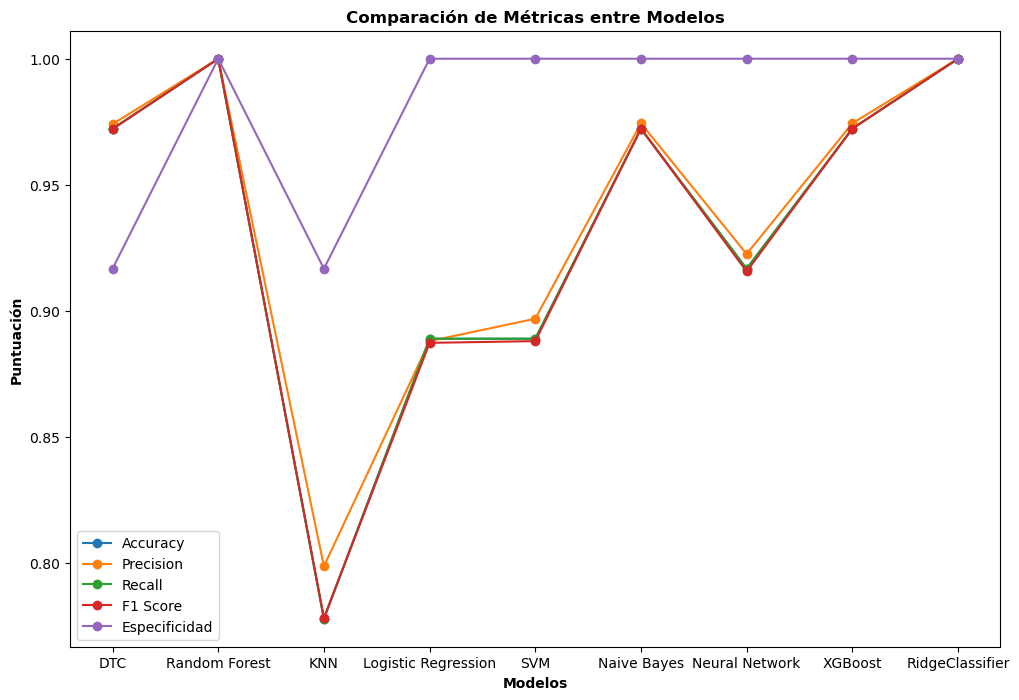

In [140]:
modelos = ['DTC', 'Random Forest', 'KNN', 'Logistic Regression', 'SVM', 'Naive Bayes', 'Neural Network', 'XGBoost', 'RidgeClassifier']

# Métricas para cada modelo
accuracy = [accuracy_dtc, accuracy_rf, accuracy_knn, accuracy_logistic, accuracy_svm, accuracy_nb, accuracy_nn, accuracy_xgb, accuracy_ridge]
precision = [precision_dtc, precision_rf, precision_knn, precision_logistic, precision_svm, precision_nb, precision_nn, precision_xgb, precision_ridge]
recall = [recall_dtc, recall_rf, recall_knn, recall_logistic, recall_svm, recall_nb, recall_nn, recall_xgb, recall_ridge]
f1_score = [f1_dtc, f1_rf, f1_knn, f1_logistic, f1_svm, f1_nb, f1_nn, f1_xgb, f1_ridge]
especificidad = [specificity_dtc, specificity_rf, specificity_knn, specificity_logistic, specificity_svm, specificity_nb, specificity_nn, specificity_xgb, specificity_ridge]

index = np.arange(len(modelos)) # Configuración del gráfico
fig, ax = plt.subplots(figsize=(12, 8)) # Crear el gráfico de líneas

# Línea para Accuracy
ax.plot(modelos, accuracy, marker='o', label='Accuracy')

# Línea para Precision
ax.plot(modelos, precision, marker='o', label='Precision')

# Línea para Recall
ax.plot(modelos, recall, marker='o', label='Recall')

# Línea para F1 Score
ax.plot(modelos, f1_score, marker='o', label='F1 Score')

# Línea para Especificidad
ax.plot(modelos, especificidad, marker='o', label='Especificidad')

# Añadir etiquetas y título
ax.set_xlabel('Modelos', fontweight='bold')
ax.set_ylabel('Puntuación', fontweight='bold')
ax.set_title('Comparación de Métricas entre Modelos', fontweight='bold')
ax.legend()

# Mostrar el gráfico
plt.show()

**EXPLICACIÓN DE LOS RESULTADOS**:

**Ridge Classifier y Random Forest**: Obtuvieron una puntuación perfecta en varias métricas (Accuracy, Precision, Recall, F1 Score), lo que sugiere un rendimiento excelente en este conjunto de datos.

**XGBoost** y **Naive Bayes**: También obtuvieron resultados muy sólidos en todas las métricas, y aunque no tuvieron una precisión perfecta, sus resultados son bastante buenos en comparación con otros modelos.

**K-Nearest Neighbors (KNN) y DTC**:
Muestra el rendimiento más bajo en comparación con otros modelos.
Tiene una especificidad de 0.92, lo que indica una tasa moderada de falsos positivos.

**Logistic Regression, SVM, Naive Bayes, Neural Network y XGBoost**:
Tienen resultados similares en términos de Accuracy, Precision, Recall y F1 Score.
Tienen una especificidad de 1.0, lo que significa que no hay falsos positivos.

Hay otras maneras de obtener la valoración del rendimiento, pero no las veo apropiadas en este caso:

- Area Under the ROC Curve (AUC-ROC): Representa el área bajo la curva ROC (Receiver Operating Characteristic). Muestra la tasa de verdaderos positivos frente a la tasa de falsos positivos para diferentes umbrales de decisión. AUC-ROC cercano a 1 se considera bueno.
- Area Under the Precision-Recall Curve (AUC-PR): Representa el área bajo la curva precisión-recuperación. Mide el rendimiento del modelo en términos de precisión y recuperación para diferentes umbrales de decisión.

Estos dos modelos mencionados se usan sobretodo cuando las clases están desequilibradas.

- **Log Loss**: PROBABILIDADES PREDICHAS, Mide la discrepancia entre las probabilidades predichas por el modelo y las etiquetas reales. Específicamente útil para modelos que proporcionan probabilidades de clase en lugar de predicciones de clase.
- Matthews Correlation Coefficient (MCC): Mide la calidad general de una CLASIFIACIÓN BINARIA. Toma valores entre -1 y 1, donde 1 indica una predicción perfecta.

Vamos a elegir los 4 modelos con mejores resultados y entrenarlos ajustando los hiperparámetros.

### EXERCICI 3: Entrena els models usant els diferents paràmetres que admeten per tal de millorar-ne la predicció. ### 

Adjunto los parámetros que admiten cada uno de los cuatro modelos elegidos y vuelvo a comparar los resultados.

In [100]:
rf_model.get_params() #podrían ser todos estos pero tengo problemas al utilizarlos. 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [141]:
# Random Forest Grid Search
rf_model = RandomForestClassifier()
rf_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [91]:
# XGBoost Grid Search
xgb_model = XGBClassifier()
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]}
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [92]:
# Decision Tree Grid Search
dt_model = DecisionTreeClassifier()
dt_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}
dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [93]:
# Naive Bayes Grid Search
nb_model = GaussianNB()
nb_params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
nb_grid = GridSearchCV(nb_model, nb_params, cv=5, scoring='accuracy')
nb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [104]:
# Ridge Clasifier Grid Search
ridge_model = RidgeClassifier()
ridge_params = {
    'alpha': [0.1, 1.0, 10.0],  # Ajusta los valores según sea necesario
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='accuracy')
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='accuracy')

In [105]:
# Realizar predicciones en el conjunto de prueba para cada modelo
y_pred_rf = rf_grid.predict(X_test)
y_pred_xgb = xgb_grid.predict(X_test)
y_pred_dt = dt_grid.predict(X_test)
y_pred_nb = nb_grid.predict(X_test)
y_pred_ridge = ridge_grid.predict(X_test)  # Agregar .predict() aquí

# Acceder al mejor puntaje y parámetros para cada modelo
print("Random Forest Best Parameters:", rf_grid.best_params_,"\n")
print("Random Forest Best Accuracy:", rf_grid.best_score_,"\n")

print("XGBoost Best Parameters:", xgb_grid.best_params_,"\n")
print("XGBoost Best Accuracy:", xgb_grid.best_score_,"\n")

print("Decision Tree Best Parameters:", dt_grid.best_params_,"\n")
print("Decision Tree Best Accuracy:", dt_grid.best_score_,"\n")

print("Naive Bayes Best Parameters:", nb_grid.best_params_,"\n")
print("Naive Bayes Best Accuracy:", nb_grid.best_score_,"\n")

print("Ridge Best Parameters:", ridge_grid.best_params_,"\n")
print("Ridge Best Accuracy:", ridge_grid.best_score_,"\n")  # Agregar línea para acceder al mejor puntaje


Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest Best Accuracy: 0.993103448275862
XGBoost Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
XGBoost Best Accuracy: 0.9724137931034482
Decision Tree Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Decision Tree Best Accuracy: 0.9371921182266011
Naive Bayes Best Parameters: {'var_smoothing': 1e-09}
Naive Bayes Best Accuracy: 0.9719211822660098
Ridge Best Parameters: {'alpha': 1.0, 'solver': 'auto'}
Ridge Best Accuracy: 0.9862068965517242


          Modelo  Accuracy  Best Accuracy  \
0  Decision Tree      0.94           0.94   
1  Random Forest      1.00           0.99   
2    Naive Bayes      0.97           0.97   
3        XGBoost      0.97           0.97   
4          Ridge      1.00           0.99   

                                     Best Parameters  
0  {'max_depth': None, 'min_samples_leaf': 2, 'mi...  
1  {'max_depth': None, 'min_samples_leaf': 1, 'mi...  
2                           {'var_smoothing': 1e-09}  
3  {'colsample_bytree': 0.8, 'learning_rate': 0.2...  
4                   {'alpha': 1.0, 'solver': 'auto'}  


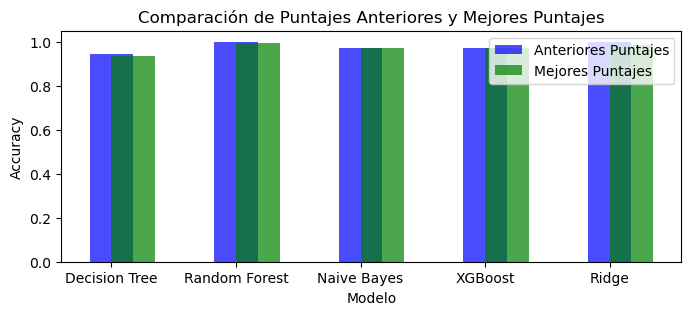

In [109]:
# Resultados anteriores
previous_results = {
    'Modelo': ['Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression', 'SVM', 'Naive Bayes', 'Neural Network', 'XGBoost', 'Ridge'],
    'Accuracy': [accuracy_dtc, accuracy_rf, accuracy_knn, accuracy_logistic, accuracy_svm, accuracy_nb, accuracy_nn, accuracy_xgb, accuracy_ridge]
}

# Mejores resultados de Grid Search
grid_search_results = {
    'Modelo': ['Random Forest', 'XGBoost', 'Decision Tree', 'Naive Bayes', 'Ridge'],
    'Best Accuracy': [rf_grid.best_score_, xgb_grid.best_score_, dt_grid.best_score_, nb_grid.best_score_, ridge_grid.best_score_],
    'Best Parameters': [rf_grid.best_params_, xgb_grid.best_params_, dt_grid.best_params_, nb_grid.best_params_, ridge_grid.best_params_]
}

# Crear DataFrames
previous_results_df = pd.DataFrame(previous_results)
grid_search_results_df = pd.DataFrame(grid_search_results)

# Fusionar los DataFrames en función del nombre del modelo
merged_results_df = pd.merge(previous_results_df, grid_search_results_df, on='Modelo', how='inner')

# Mostrar la tabla comparativa
print(merged_results_df)

plt.figure(figsize=(8, 3))
bar_width = 0.35

bar1 = plt.bar(merged_results_df['Modelo'], merged_results_df['Accuracy'], width=bar_width, label='Anteriores Puntajes', color='blue', alpha=0.7)
bar2 = plt.bar(merged_results_df['Modelo'], merged_results_df['Best Accuracy'], width=bar_width, label='Mejores Puntajes', color='green', alpha=0.7, align='edge')

plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.title('Comparación de Puntajes Anteriores y Mejores Puntajes')
plt.legend()
plt.show()


OBSERVACIONES: 
Solo veo mejora una leve mejora en los resultados de DT y Ridge, Random forest, empeoró muy levemente. 

A nivel general, no veo que el hecho de haber jugado con los hiperparámetros, nos haya dado mejores resultados.

Provaremos con el Cross validation.

## EXERCICI 4.  AVALUACIÓ DEL RENDIMENT   ##

Valoraré el rendimienton con el **cross validation**

In [99]:
# Random Forest
best_rf_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
rf_model = RandomForestClassifier(**best_rf_params)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

# XGBoost
best_xgb_params = {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
xgb_model = XGBClassifier(**best_xgb_params)
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)

# Decision Tree
best_dt_params = {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
dt_model = DecisionTreeClassifier(**best_dt_params)
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5)

# Naive Bayes
best_nb_params = {'var_smoothing': 1e-09}
nb_model = GaussianNB(**best_nb_params)
nb_cv_scores = cross_val_score(nb_model, X_train, y_train, cv=5)

# Ridge
best_ridge_params = {'alpha': 0.1, 'solver': 'auto'}
ridge_model = RidgeClassifier(**best_ridge_params)
ridge_cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5)

# Imprimir los resultados
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Random Forest Mean CV Score:", rf_cv_scores.mean(),"\n")

print("XGBoost Cross-Validation Scores:", xgb_cv_scores)
print("XGBoost Mean CV Score:", xgb_cv_scores.mean(),"\n")

print("Decision Tree Cross-Validation Scores:", dt_cv_scores)
print("Decision Tree Mean CV Score:", dt_cv_scores.mean(),"\n")

print("Naive Bayes Cross-Validation Scores:", nb_cv_scores)
print("Naive Bayes Mean CV Score:", nb_cv_scores.mean(),"\n")

print("Ridge Cross-Validation Scores:", ridge_cv_scores)
print("Ridge Mean CV Score:", ridge_cv_scores.mean(),"\n")


Random Forest Cross-Validation Scores: [1.         0.93103448 1.         0.96428571 1.        ]
Random Forest Mean CV Score: 0.9790640394088669 

XGBoost Cross-Validation Scores: [0.93103448 0.93103448 1.         1.         1.        ]
XGBoost Mean CV Score: 0.9724137931034482 

Decision Tree Cross-Validation Scores: [0.86206897 0.93103448 0.92857143 0.85714286 1.        ]
Decision Tree Mean CV Score: 0.9157635467980295 

Naive Bayes Cross-Validation Scores: [1.         0.93103448 1.         0.92857143 1.        ]
Naive Bayes Mean CV Score: 0.9719211822660098 

Ridge Cross-Validation Scores: [1.         0.93103448 1.         0.96428571 1.        ]
Ridge Mean CV Score: 0.9790640394088669 



          Modelo  Accuracy  Best Accuracy  \
0  Decision Tree      0.97           0.94   
1  Random Forest      1.00           0.99   
2    Naive Bayes      0.97           0.97   
3        XGBoost      0.97           0.97   
4          Ridge      1.00           0.99   

                                     Best Parameters  Mean CV Score  
0  {'max_depth': None, 'min_samples_leaf': 2, 'mi...           0.99  
1  {'max_depth': None, 'min_samples_leaf': 2, 'mi...           0.97  
2                           {'var_smoothing': 1e-09}           0.92  
3  {'colsample_bytree': 0.8, 'learning_rate': 0.2...           0.97  
4                   {'alpha': 1.0, 'solver': 'auto'}           0.98  


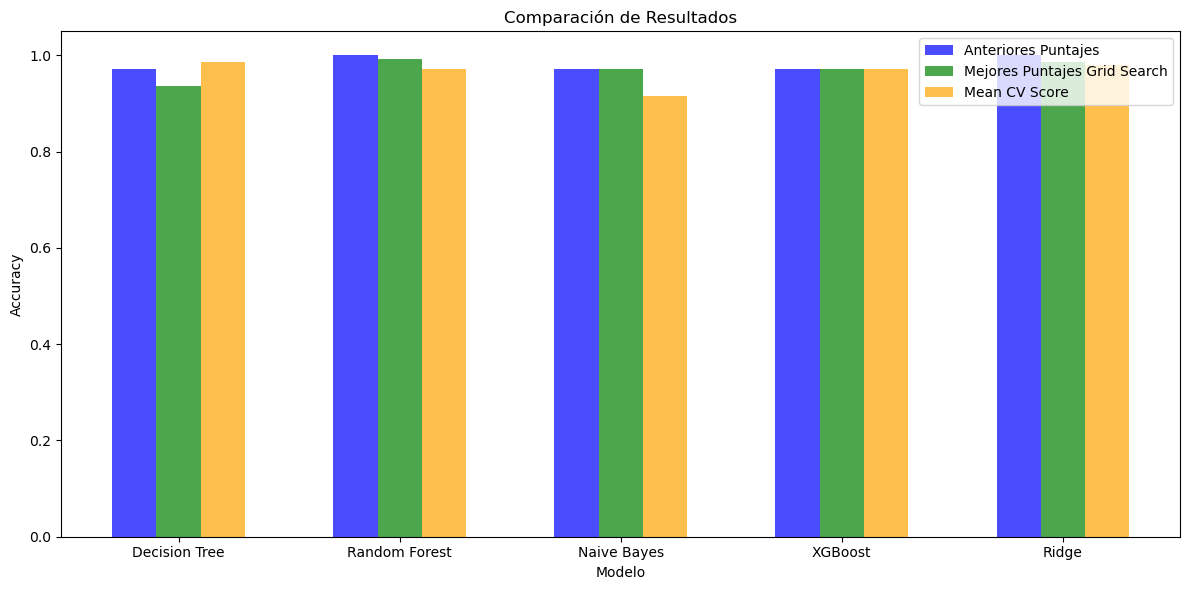

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier

# Resultados anteriores
previous_results = {
    'Modelo': ['Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression', 'SVM', 'Naive Bayes', 'Neural Network', 'XGBoost', 'Ridge'],
    'Accuracy': [accuracy_dtc, accuracy_rf, accuracy_knn, accuracy_logistic, accuracy_svm, accuracy_nb, accuracy_nn, accuracy_xgb, accuracy_ridge]
}

# Mejores resultados de Grid Search
grid_search_results = {
    'Modelo': ['Random Forest', 'XGBoost', 'Decision Tree', 'Naive Bayes', 'Ridge'],
    'Best Accuracy': [rf_grid.best_score_, xgb_grid.best_score_, dt_grid.best_score_, nb_grid.best_score_, ridge_grid.best_score_],
    'Best Parameters': [rf_grid.best_params_, xgb_grid.best_params_, dt_grid.best_params_, nb_grid.best_params_, ridge_grid.best_params_]
}

# Resultados de Cross-Validation
rf_cv_scores = cross_val_score(RandomForestClassifier(**best_rf_params), X_train, y_train, cv=5)
xgb_cv_scores = cross_val_score(XGBClassifier(**best_xgb_params), X_train, y_train, cv=5)
dt_cv_scores = cross_val_score(DecisionTreeClassifier(**best_dt_params), X_train, y_train, cv=5)
nb_cv_scores = cross_val_score(GaussianNB(**best_nb_params), X_train, y_train, cv=5)
ridge_cv_scores = cross_val_score(RidgeClassifier(**best_ridge_params), X_train, y_train, cv=5)

# Crear DataFrames
previous_results_df = pd.DataFrame(previous_results)
grid_search_results_df = pd.DataFrame(grid_search_results)

# Fusionar los DataFrames en función del nombre del modelo
merged_results_df = pd.merge(previous_results_df, grid_search_results_df, on='Modelo', how='inner')

# Añadir resultados de Cross-Validation
merged_results_df['Mean CV Score'] = [rf_cv_scores.mean(), xgb_cv_scores.mean(), dt_cv_scores.mean(), nb_cv_scores.mean(), ridge_cv_scores.mean()]

# Mostrar la tabla comparativa
print(merged_results_df)

# Configurar posiciones de barras
bar_width = 0.2
index = np.arange(len(merged_results_df['Modelo']))

# Visualizar los resultados con un gráfico de barras
plt.figure(figsize=(12, 6))

plt.bar(index - bar_width, merged_results_df['Accuracy'], width=bar_width, label='Anteriores Puntajes', color='blue', alpha=0.7)
plt.bar(index, merged_results_df['Best Accuracy'], width=bar_width, label='Mejores Puntajes Grid Search', color='green', alpha=0.7)
plt.bar(index + bar_width, merged_results_df['Mean CV Score'], width=bar_width, label='Mean CV Score', color='orange', alpha=0.7)

plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.title('Comparación de Resultados')
plt.xticks(index, merged_results_df['Modelo'])
plt.legend()
plt.tight_layout()
plt.show()


A excepción del Decision Tree, todos los modelos han empeorado ligeramente. Solo XGBoost, se ha mantenido inamovible. 